In [26]:
# Importing some libraries that I will use 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('winequalityN.csv')  # Reading the dataset
data.head()  # shows top five datas and their qualities in dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
data.shape  # shows how many datas that we have and how many columns are there for qualities 

(6497, 13)

In [29]:
data.info()  # there are 13 qualities of wines, their data types and we can figure out where and which lost data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [30]:
# also I used isnull() function to observe where and which lost data

data.isnull().sum().sort_values(ascending=False) 

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

As you can see, there are some missing values. I will replace the missing the values with the column mean.

In [31]:
# there was 7 columns for missing values, and they were fixed acidity, pH, volatile acidity, sulphates, citric acid, 
# residual sugar and chlorides. I replaced the missing the values for these columns with the column mean.

missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]
for col in missing_val_cols:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [32]:
data.isnull().sum()  # checking for if there are any more missing values

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
data['type'].value_counts()  # as you can see there is an unbalanced dataset, more number of white wine than red

white    4898
red      1599
Name: type, dtype: int64

In [34]:
data['quality'].value_counts() 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

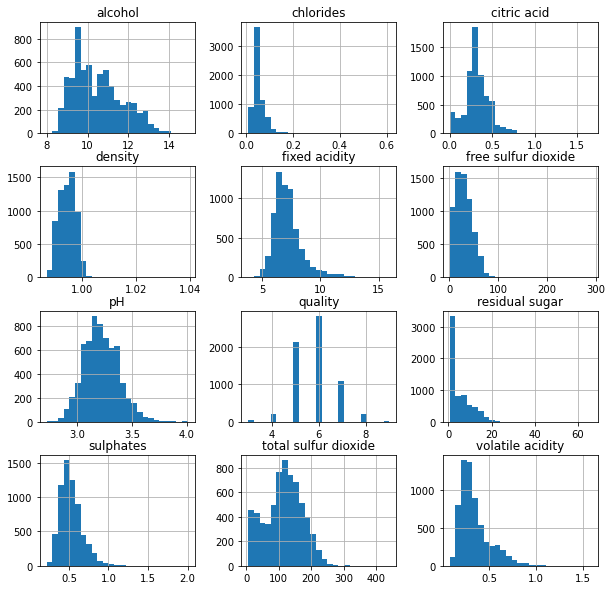

In [35]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# It reveals that how that data is easily distributed on features.

Text(0, 0.5, 'alcohol')

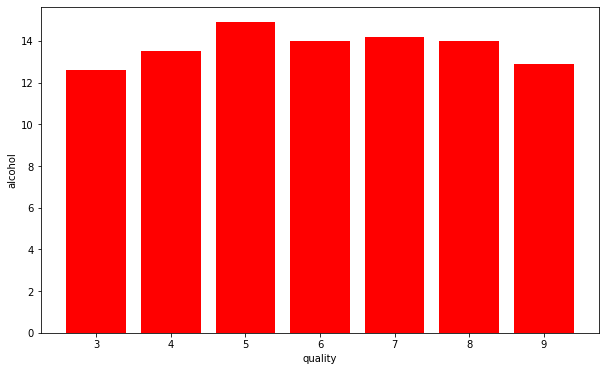

In [36]:
# Now, we plot the bar graph in which we check what value of alcohol can able to make changes in quality.

plt.figure(figsize=[10,6])

plt.bar(data['quality'],data['alcohol'],color='red')

plt.xlabel('quality')

plt.ylabel('alcohol') 

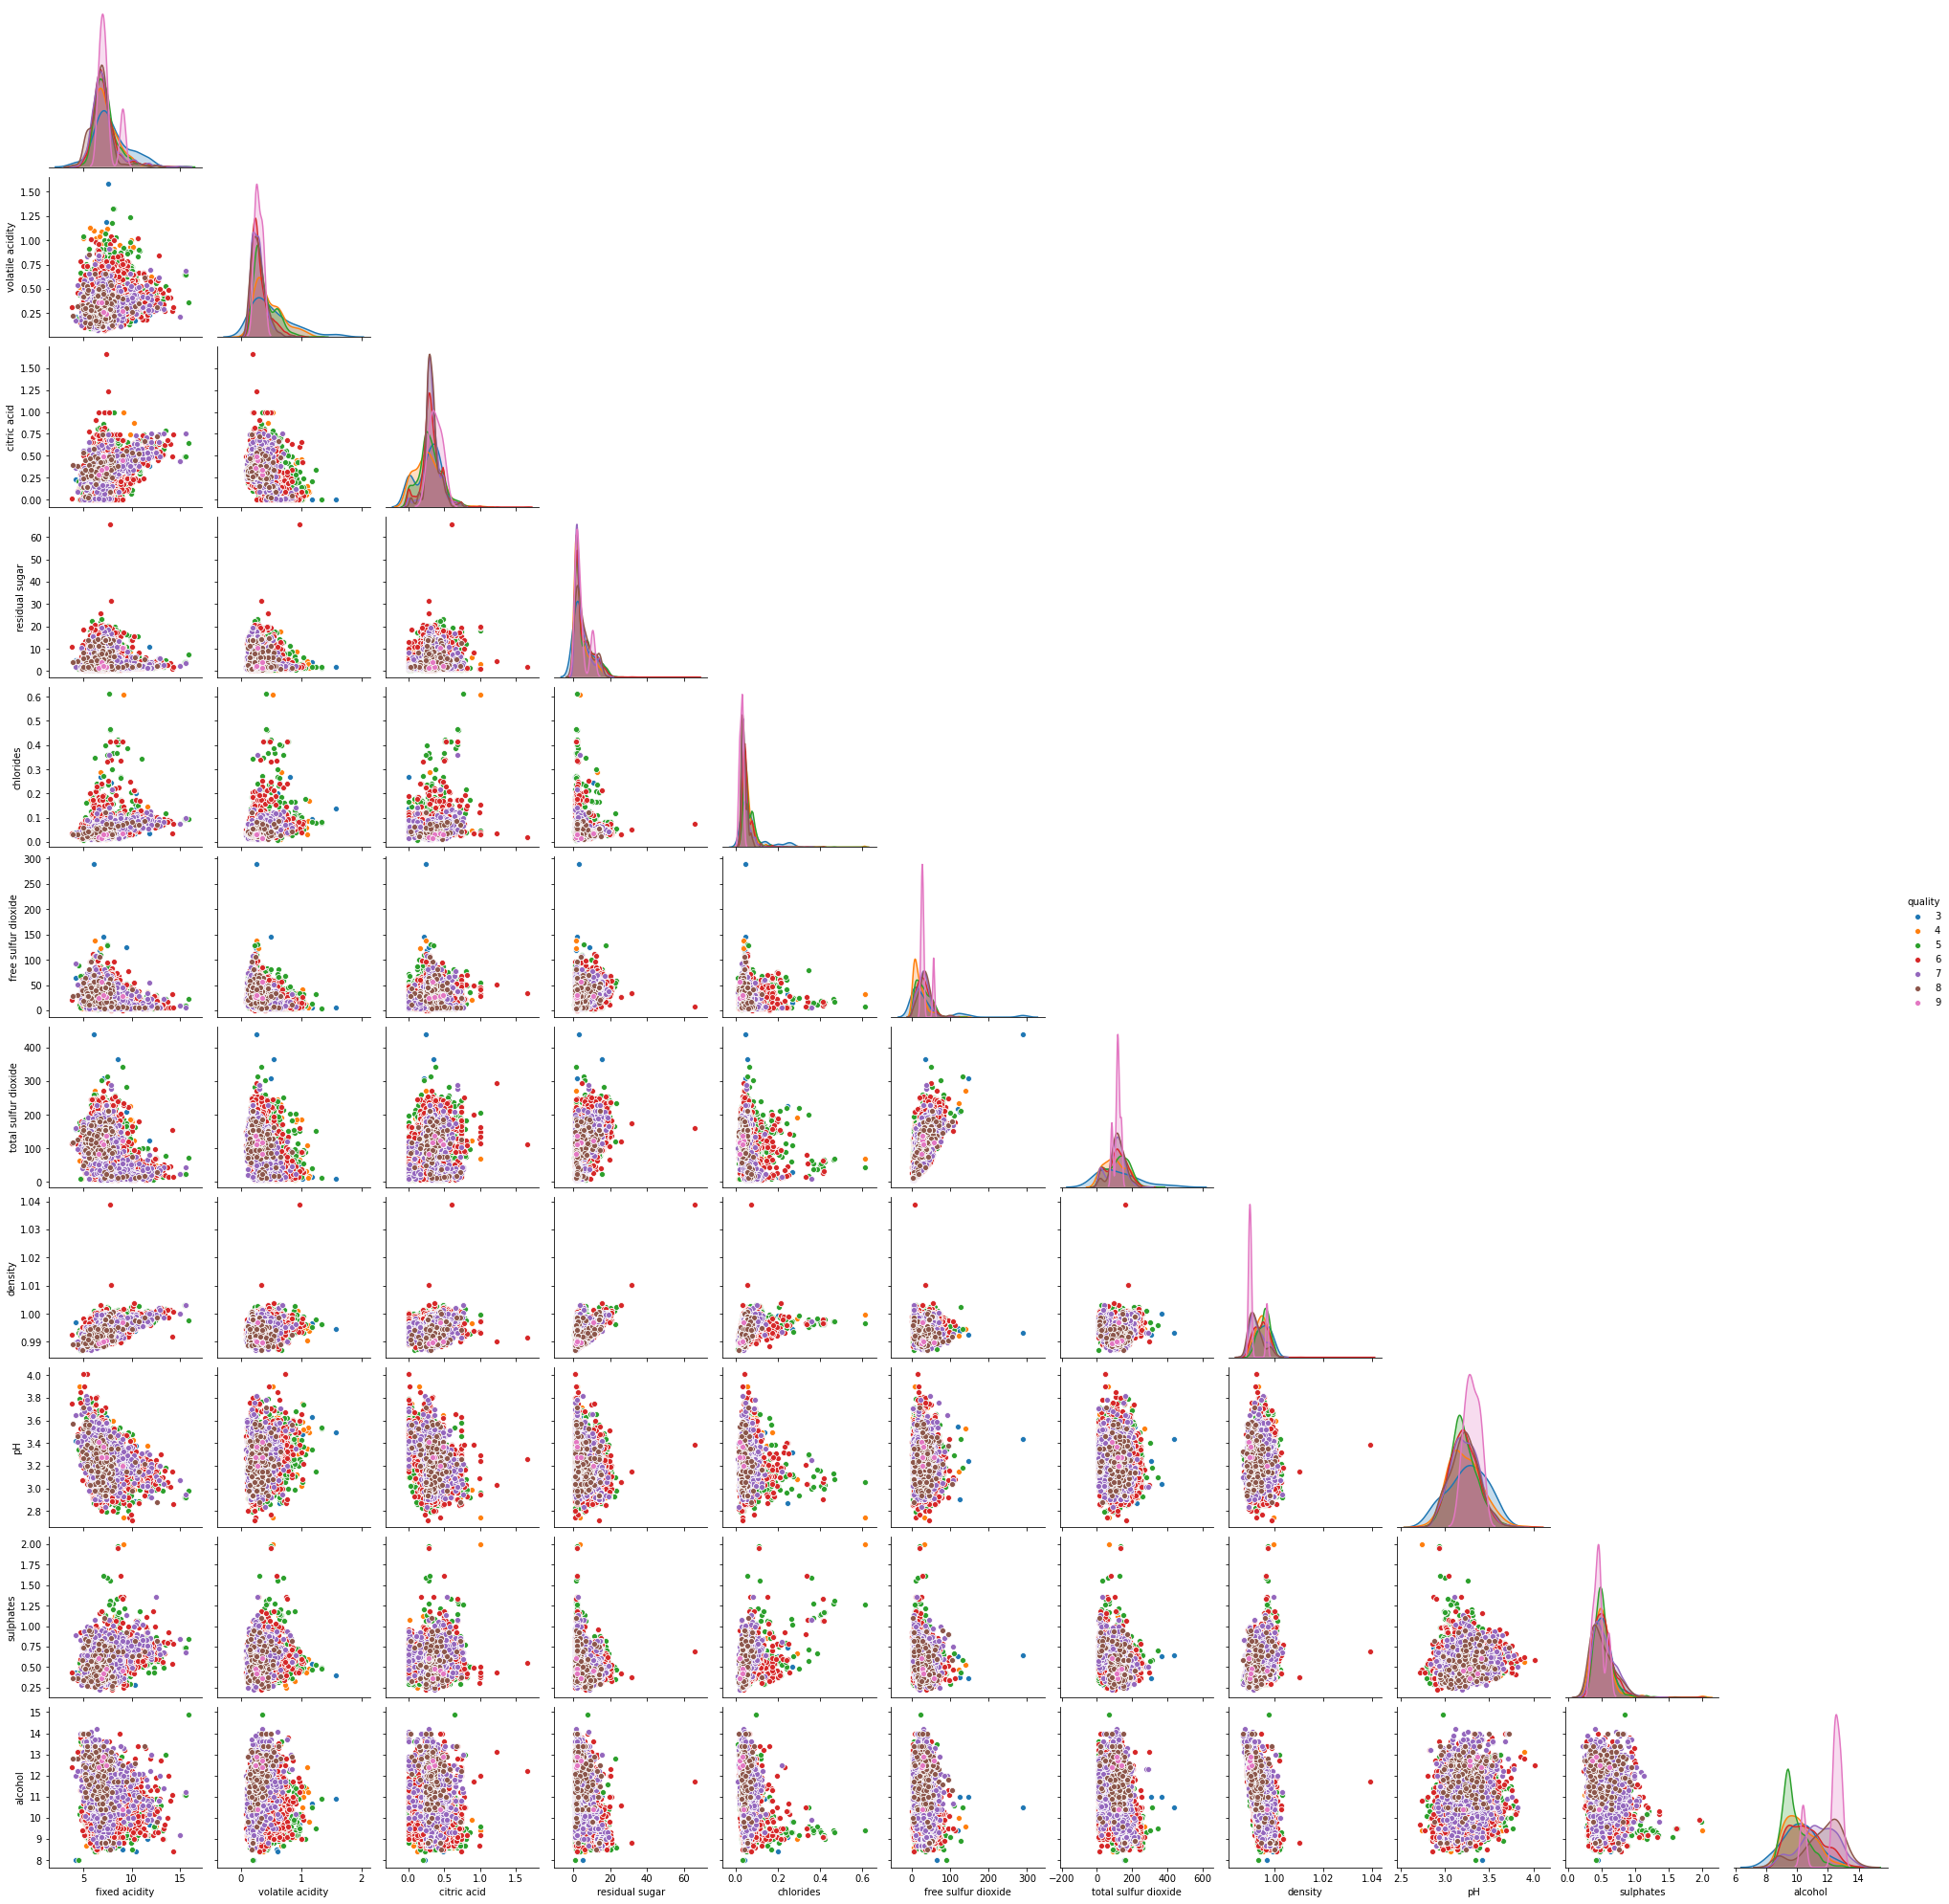

In [37]:
sns.pairplot(data, hue='quality', corner=True)

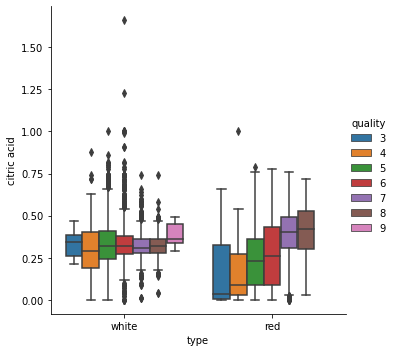

In [39]:
sns.catplot(x="type", y="citric acid", kind="box", hue="quality", data=data)

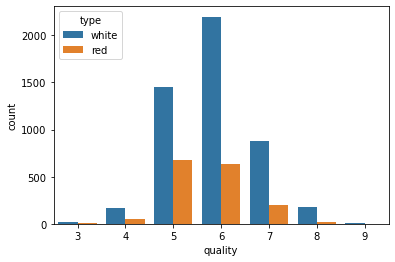

In [40]:
sns.countplot(x="quality", hue="type", data=data)

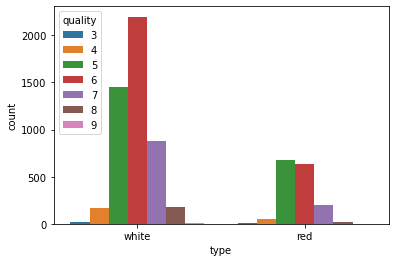

In [41]:
sns.countplot(x="type", hue="quality", data=data)

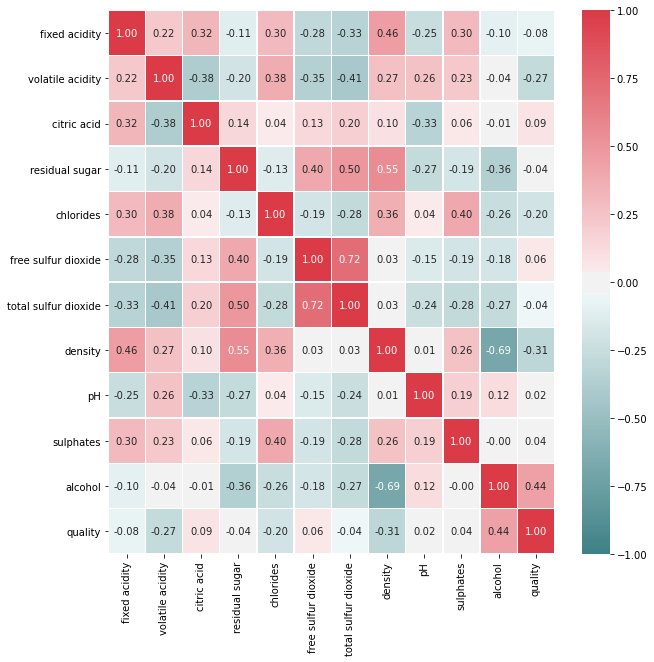

In [42]:
# For checking correlation we use a statistical method that finds the bonding and relationship between two features.
corr = data.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

In [43]:
# since the column "type" of data type, we convert it into integer by assigning values 0 and 1 to wine types

data = pd.get_dummies(data, drop_first=True)

In [44]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [45]:
# renaming the column "type_white" to "wine_type" by using rename() function

data = data.rename(columns={"type_white": "wine_type"})

In [46]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [47]:
# since we had an unbalanced dataset with respect to wine quality, 
# we divide the qualities into two groups : 1 (for wine quality 7, 8, 9) and 0 (for 6 and below)

data["wine_quality"] = [1 if x>6 else 0 for x in data.quality]

In [48]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


In [49]:
y = data["wine_quality"]   # store the label in lets say "y"
y.value_counts()

0    5220
1    1277
Name: wine_quality, dtype: int64

In [50]:
# store the feature columns in lets say "x" 

x = data.drop(["quality", "wine_quality"], axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


Model Training Part 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score  # importing our 4 metrics

In [52]:
log = pd.DataFrame(columns=["model", "accuracy", "precision", "recall", "f1"]) # we create a comparison table between algorithms

In [53]:
# a split operation on our dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn.linear_model import LogisticRegression    # Logistic Regression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

log = log.append({"model": "Logistic Regression", "accuracy": score, "precision": score2, 
                  "recall" : score3, "f1" : score4}, ignore_index=True)

In [55]:
from sklearn.tree import DecisionTreeClassifier    # Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

log = log.append({"model": "Decision Tree", "accuracy": score, "precision": score2, 
                  "recall" : score3, "f1" : score4}, ignore_index=True)

In [56]:
from sklearn.neighbors import KNeighborsClassifier  # KNN 
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score4 = f1_score(y_test, y_pred)

log = log.append({"model": "K-Nearest Neighbors", "accuracy": score, "precision": score2, 
                  "recall" : score3, "f1" : score4}, ignore_index=True)

In [57]:
log

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.823846,0.630435,0.229249,0.336232
1,Decision Tree,0.838462,0.585657,0.581028,0.583333
2,K-Nearest Neighbors,0.806923,0.504854,0.411067,0.453159
